# Agglomerative Clustering

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from stop_words import get_stop_words
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder

from utils import add_epoch_division, linkage_matrix, plot_dendrogram, remove_noise_poet, text_cleaning

In [20]:
corpus = text_cleaning(pd.read_csv("../corpora/german_poems.csv"))

In [4]:
LOWERCASE = True
MAX_FEATURES = 10000
STOP_WORDS = get_stop_words("de")

In [5]:
# reduce corpus
epochs = {"Frühaufklärung": {"b": 1700, "e": 1755},
          "Biedermeier": {"b": 1815, "e": 1848}
         }
corpus = add_epoch_division(corpus, epochs, epoch_exception="")

epoch1 = "Frühaufklärung"
epoch2 = "Biedermeier"
corpus = corpus[(corpus.epoch == epoch1) | (corpus.epoch == epoch2)]

In [6]:
#corpus = corpus.sample(10000)

In [7]:
vectorizer = TfidfVectorizer(max_df=0.5,
                             lowercase=LOWERCASE,
                             max_features=MAX_FEATURES,
                             stop_words=STOP_WORDS)
features = vectorizer.fit_transform(corpus["poem"])

text = corpus["poem"]
classes = [c[0] for c in corpus["epoch"].values]
pids = [p for p in corpus["pid"].values]

## Clustering

In [8]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(features.toarray())

In [9]:
%%time
agcl = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model = agcl.fit(X_red)

CPU times: user 42.4 s, sys: 7.04 s, total: 49.4 s
Wall time: 1min 8s


In [10]:
def get_font_size(p):
    font_size = 20-p
    if font_size < 4:
        font_size = 4
    return font_size    

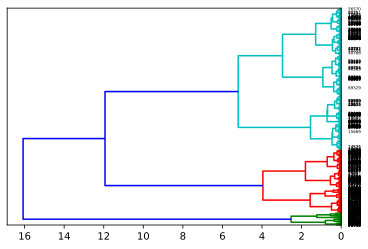

In [11]:
p = 4000
cluster_labels = pids

l = dendrogram(linkage_matrix(model), 
               p=p, 
               truncate_mode='lastp', 
               labels=cluster_labels, 
               orientation="left",
               leaf_font_size=get_font_size(p),
               show_leaf_counts=False,
               get_leaves=True)
plt.show()

In [12]:
noise = [leaf for leaf in l["ivl"] if leaf != ""]

In [16]:
corpus_noiseless = remove_noise_poet(corpus, noise)

In [17]:
corpus_noiseless.to_csv("../corpora/german_poems_noiseless.csv", index=False)

In [261]:
print(model.children_.shape)
model.children_[:]

(9999, 2)


array([[ 2332,  8523],
       [  391,  6944],
       [  421,  3428],
       ...,
       [19994, 19995],
       [19992, 19996],
       [19993, 19997]])